# Extract real-time stock quotes and visualize how it goes up or down

***Using Yahoo Finance***

[*********************100%***********************]  1 of 1 completed


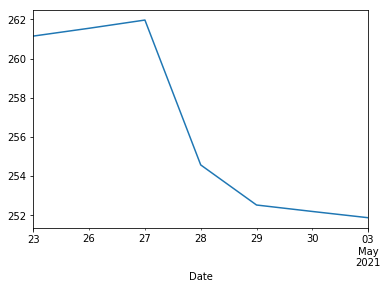

In [8]:
# Get stock prices, the last 7 days
import yfinance as yf
df = yf.download(tickers=['MSFT'],
                #    start='2021-04-20',
                #    end='2021-04-29',
                   period="7d", 
                   interval="1d"
                  )
df.to_csv('../data/10.pulledStockPrices.csv')

# Plot the close prices
import matplotlib.pyplot as plt
%matplotlib inline
df['Adj Close'].plot()
plt.show()

***Using a website URL***

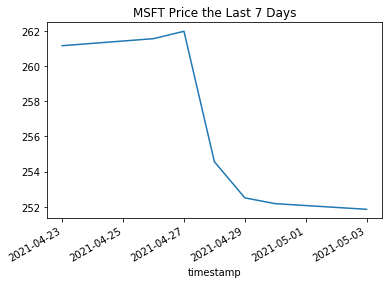

In [9]:
#OPTION 2
import pandas as pd
def stock_trend_line(stock:str, num_days=7):
    df= pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol='+stock+'&apikey=demo&datatype=csv')
    df=df.drop(columns=['volume','open','high','low'])
    for i in range(0,len(df)):
        x=df.loc[i,'timestamp']
        x=x[0:4]+x[5:7]+x[8:10]
        df.loc[i,'timestamp'] = pd.Timestamp(x)
    df = df.set_index('timestamp')
    df=df.head(num_days)
    df.plot(title=stock+' Price the Last '+str(num_days)+' Days', legend=False)

stock_trend_line('MSFT')